## 부산대학교 SW 융합교육원 K-train AIP 과정

실습일자: 2025-07-14

작성자: 김태연

## 실습 문제: 최소-최대 정규화 (Min-Max Normalization)

**설명**: 최소-최대 정규화는 데이터의 모든 값을 0과 1 사이의 범위로 조정하는 표준화 기법입니다. 이 방법은 데이터의 최솟값을 0으로, 최댓값을 1로 변환하여 모든 데이터 포인트가 이 범위 내에 비례적으로 위치하도록 만듭니다. 이번 실습의 목표는 주어진 숫자 리스트에 최소-최대 정규화 공식을 적용하는 Python 함수를 작성하는 것입니다.

$$X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}$$

**요구사항**:

  - 숫자 리스트를 인자로 받는 `min_max_normalize` 함수를 완성하세요.
  - 함수 내에서 리스트의 최솟값(`min`)과 최댓값(`max`)을 찾으세요.
  - 리스트의 각 숫자에 최소-최대 정규화 공식을 적용하여 새로운 리스트를 생성하고 반환하세요.
  - 주어진 샘플 데이터로 함수를 테스트하고 결과를 출력하여 확인하세요.



Original Data: [ 10  20  50  60  80 100]
Normalized Data: [0.         0.11111111 0.44444444 0.55555556 0.77777778 1.        ]
Original Data: [[-1.58398063 -0.60049038 -1.09235397 -1.33102152]
 [-0.53875655  0.52399439  0.22714671 -2.0181254 ]
 [ 0.1127258  -0.11048935 -0.95867763 -0.78308762]
 [-0.84636912  1.15136887  0.07782301  1.98195254]
 [-1.01459709 -0.33303964  1.94794779 -0.76764298]]
Normalized Data: [[0.22289516 0.32922842 0.27386758 0.25287085]
 [0.43904557 0.56849041 0.55462968 0.11122664]
 [0.57377091 0.43348827 0.30231111 0.36582562]
 [0.37543186 0.70197987 0.52285673 0.93582956]
 [0.34064263 0.38613519 0.92078009 0.36900948]]
열 별 최솟값 : [0. 0. 0. 0.]
열 별 최댓값 : [1. 1. 1. 1.]


(array([[ 1.,  3., 11., 23., 19., 32., 25., 20.,  8.,  8.],
        [ 3., 11., 15., 33., 33., 31., 11.,  9.,  3.,  1.],
        [ 5.,  7., 17., 16., 26., 33., 23.,  8.,  9.,  6.],
        [ 2.,  6., 13., 20., 34., 22., 24., 18.,  7.,  4.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 4 BarContainer objects>)

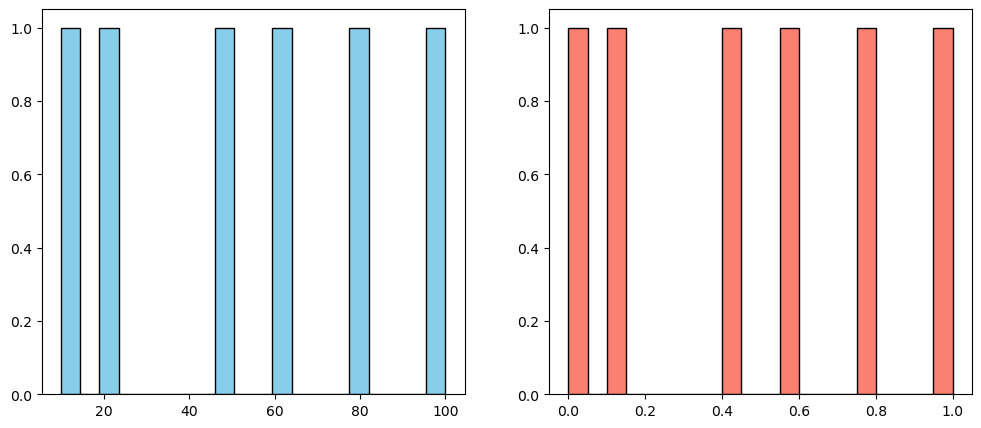

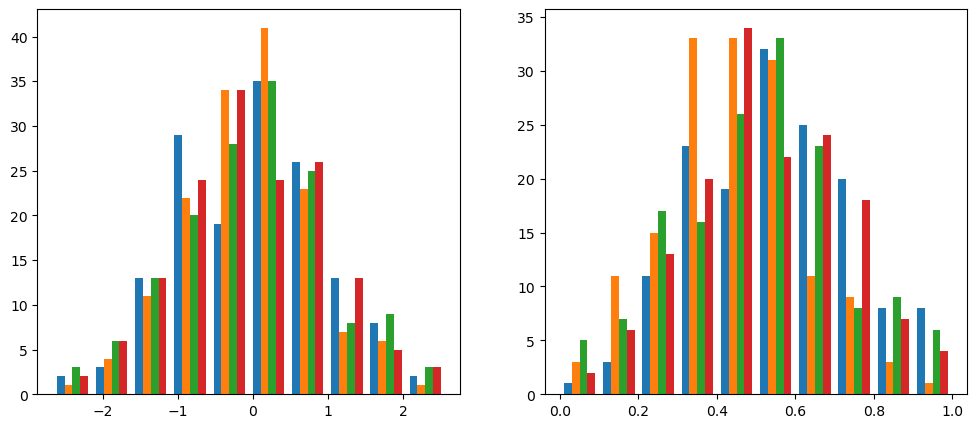

In [35]:
#최소-최대 정규화(Min-Max Normalization)를 두 가지 데이터(1차원, 2차원)에 적용
#2차원 데이터의 경우 각 특성(열)별로 정규화를 수행하는 올바른 방법

import numpy as np
import matplotlib.pyplot as plt

def min_max_normalize(data: list[float]) -> list[float]:
    min = np.min(data) #데이터 전체에서 최솟값 찾기
    max = np.max(data) #데이터 전체에서 최댓값 찾기
    return (data-min)/(max-min)

sample_data = np.array([10, 20, 50, 60, 80, 100])
normalized_data = min_max_normalize(sample_data)
print(f"Original Data: {sample_data}")
print(f"Normalized Data: {normalized_data}")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].hist(sample_data, bins=20, color='skyblue', edgecolor='black')
axes[1].hist(normalized_data, bins=20, color='salmon', edgecolor='black')

# 2차원 배열에서는 일반적으로 머신러닝에서는 각 특성(열)별로 정규화를 진행
# 각 열(axis=0)을 기준으로 정규화하도록 수정한 함수
def min_max_normalize_columns(data: np.ndarray) -> np.ndarray:
    min_vals = np.min(data, axis=0) # 각 열의 최소값
    max_vals = np.max(data, axis=0) # 각 열의 최대값
    return (data - min_vals) / (max_vals - min_vals)

sample_data2 = np.random.randn(150,4)
normalized_data2 = min_max_normalize_columns(sample_data2)
print(f"Original Data: {sample_data2[:5,:]}")
print(f"Normalized Data: {normalized_data2[:5,:]}")
#정규화된 데이터의 최대/최솟값 확인
print(f"열 별 최솟값 : {np.min(normalized_data2,axis=0)}") #->0
print(f"열 별 최댓값 : {np.max(normalized_data2,axis=0)}") #->1
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].hist(sample_data2, bins=10)
axes[1].hist(normalized_data2, bins=10)

# plt.hist(sample_data2)
# plt.hist(normalized_data2)

## 실습 문제: 표준화 (Z-score 정규화)

**설명**: 표준화(Standardization), 또는 Z-score 정규화는 데이터의 분포를 평균이 0이고 표준편차가 1이 되도록 변환하는 방법입니다. 이 변환을 통해 서로 다른 단위나 스케일을 가진 데이터를 비교할 수 있게 됩니다. 이번 실습에서는 주어진 숫자 리스트를 Z-score 정규화 공식을 사용하여 표준화하는 Python 함수를 `Numpy` 라이브러리를 이용해 작성합니다.

$$Z = \frac{X - \mu}{\sigma}$$

**요구사항**:

  - `Numpy` 배열을 인자로 받는 `standardize` 함수를 완성하세요.
  - 함수 내에서 `Numpy`를 사용하여 배열의 평균(`μ`)과 표준편차(`σ`)를 계산하세요.
  - 배열의 각 요소에 Z-score 공식을 적용하여 새로운 배열을 생성하고 반환하세요.
  - 주어진 샘플 데이터로 함수를 테스트하고, 변환된 데이터의 평균과 표준편차를 출력하여 결과가 0과 1에 가까운지 확인하세요.



In [ ]:

import numpy as np

def standardize(data: np.ndarray) -> np.ndarray:
    """
    주어진 Numpy 배열을 Z-score 정규화를 사용하여 표준화합니다.
    """
    mean = np.mean(data)
    std = np.std(data)
    return (data-mean)/std


sample_data = np.array([10, 20, 50, 60, 80, 100])
sample_data2 = np.random.randn([10, 20, 50, 60, 80, 100])
standardized_data = standardize(sample_data)

print(f"Original Data: {sample_data}")
print(f"Standardized Data: {standardized_data}")
print(f"New Mean: {np.mean(standardized_data):.2f}")
print(f"New Std Dev: {np.std(standardized_data):.2f}")

Original Data: [ 10  20  50  60  80 100]
Standardized Data: [-1.37799724 -1.05999788 -0.10599979  0.21199958  0.8479983   1.48399703]
New Mean: -0.00
New Std Dev: 1.00


## 실습 문제: 훈련, 검증, 테스트 데이터셋 분할

**설명**:
머신러닝 모델을 개발할 때, 전체 데이터셋을 **훈련(Training)**, **검증(Validation)**, **테스트(Test)** 세트로 나누는 것은 매우 중요합니다. 모델은 **훈련 세트**로 학습하고, **검증 세트**를 사용해 모델의 성능을 조정(튜닝)하며, 마지막으로 **테스트 세트**를 통해 학습 과정에 사용되지 않은 새로운 데이터에 대한 최종 성능을 공정하게 평가합니다. 이번 실습에서는 `Numpy`를 사용하여 주어진 데이터셋을 훈련, 검증, 테스트 세트로 분할하는 함수를 만듭니다.


**요구사항**:

  - 먼저 `np.random.shuffle()`을 사용해 전체 데이터셋의 순서를 무작위로 섞어 데이터가 편향되지 않도록 합니다.
  - 데이터셋을 **8:1:1** 비율 (훈련 80%, 검증 10%, 테스트 10%)로 분할하세요. 전체 데이터의 개수를 기반으로 각 세트의 크기를 계산해야 합니다.
  - 계산된 크기에 맞게 `Numpy` 배열 슬라이싱을 사용하여 `train_set`, `val_set`, `test_set`을 생성하고 반환하세요.
  - 분할된 각 데이터셋의 크기(shape)를 출력하여 비율에 맞게 잘 나뉘었는지 확인합니다.



In [ ]:

import numpy as np

def split_dataset(data: np.ndarray) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    """
    주어진 데이터셋을 훈련, 검증, 테스트 세트로 8:1:1 비율로 분할합니다.

    Args:
        data: 원본 데이터셋 (Numpy 배열).

    Returns:
        훈련, 검증, 테스트 세트로 구성된 튜플.
    """
    # 1. 데이터를 무작위로 섞습니다.
    # 2. 데이터셋 크기를 계산합니다.
    # 3. 데이터를 슬라이싱하여 세트를 나눕니다.
    
    np.random.shuffle(data)
    n = data.shape[0]
    # t = int(n*0.8)
    # v = int(n*0.9)

    # t_s,v_s,ts_s =  np.split(data,[t,v])
    # return t_s, v_s, ts_s
    return np.split(data,[int(n*0.8),int(n*0.9)])

X = np.random.randn(150, 4)
train, val, test = split_dataset(X)

print(f"Original data shape: {X.shape}")
print(f"Training set shape: {train.shape}")
print(f"Validation set shape: {val.shape}")
print(f"Test set shape: {test.shape}")

Original data shape: (150, 4)
Training set shape: (120, 4)
Validation set shape: (15, 4)
Test set shape: (15, 4)
